## Dataset

Kaggle's new competetion: Home Credit Default Risk.


Relevant variables:

AMT_CREDIT            (Continuous) Credit amount of the loan

AMT_ANNUITY           (Continuous) Loan annuity

NAME_INCOME_TYPE      (Categorical) Clients income type (businessman, working, maternity leave,?)


__Q1: Choose one variable and plot that variable four different ways.__

I chose credit amount of the loan.

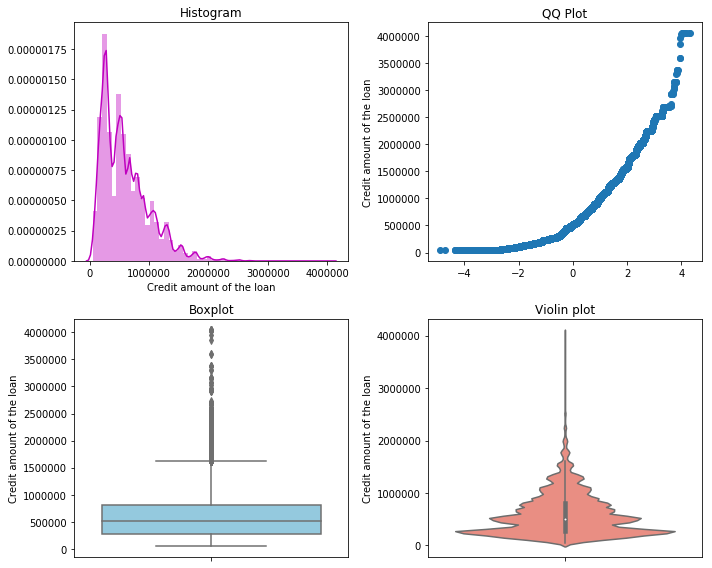

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
%matplotlib inline

#Check encoding
rawdata = open('application_train.csv', "rb").read()
chardet.detect(rawdata)

#Read data
df = pd.read_csv('application_train.csv')

#DRILL Q1: Using credit amount of the loan for fout types of plots
fig = plt.figure(figsize=(10, 8))

#Histogram
plt.subplot(221)
sns.distplot(df['AMT_CREDIT'], color="m")
plt.xlabel('Credit amount of the loan')
plt.title('Histogram')

#QQ plot
plt.subplot(222)
norm=np.random.normal(0,1,df['AMT_CREDIT'].count())
norm.sort()
plt.plot(norm, df['AMT_CREDIT'].sort_values(), "o") 
plt.ylabel('Credit amount of the loan')
plt.title('QQ Plot')

#Box plot
plt.subplot(223)
sns.boxplot(y=df["AMT_CREDIT"], color='skyblue')
plt.ylabel('Credit amount of the loan')
plt.title('Boxplot')

#Violin plot
plt.subplot(224)
sns.violinplot(y=df["AMT_CREDIT"], color='salmon')
plt.ylabel('Credit amount of the loan')
plt.title('Violin plot')
plt.tight_layout()
plt.show()

**Q2: Choose two continuous variables, and plot them three different ways.**

I chose credit amount of the loan and loan annuity.

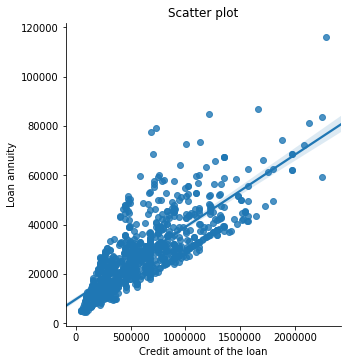

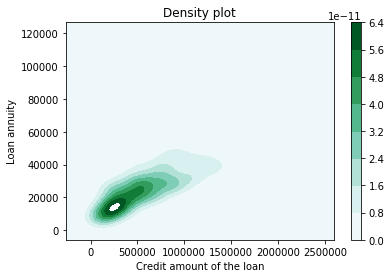

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


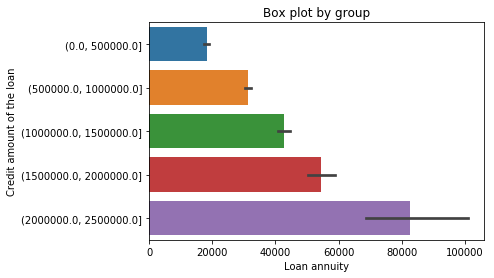

In [2]:
#DRILL Q2: Using credit amount of the loan and loan annuity for three types of plots
dataq2 = df.iloc[0:1000]

#Scatter plot
sns.lmplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=dataq2)
plt.xlabel('Credit amount of the loan')
plt.ylabel('Loan annuity')
plt.title('Scatter plot')
plt.show()

#Density plot
sns.kdeplot(dataq2['AMT_CREDIT'], dataq2['AMT_ANNUITY'], shade=True, cbar=True)
plt.xlabel('Credit amount of the loan')
plt.ylabel('Loan annuity')
plt.title('Density plot')
plt.show()

#boxplot by groupoing credit amount of the loan
bucket = np.linspace(0, 2500000, 6)
dataq2['AMT_CREDIT'] = pd.cut(dataq2['AMT_CREDIT'], bucket)
sns.barplot(y="AMT_CREDIT", x="AMT_ANNUITY", data=dataq2)
plt.ylabel('Credit amount of the loan')
plt.xlabel('Loan annuity')
plt.title('Box plot by group')
plt.show()


**Q3: Choose one continuous variable and one categorical variable, and plot them six different ways.**

I used all three variables.

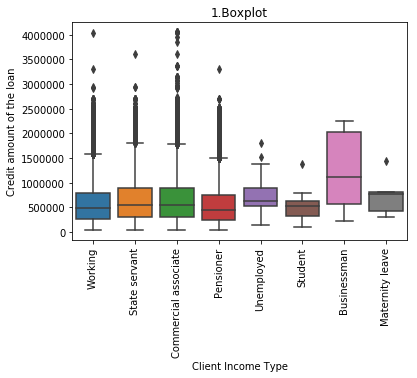

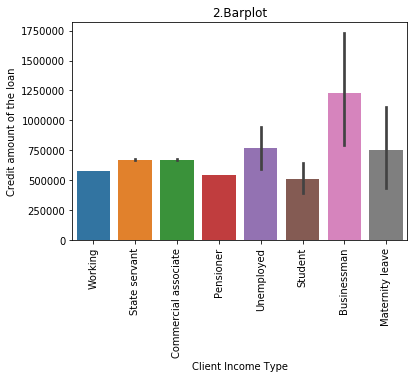

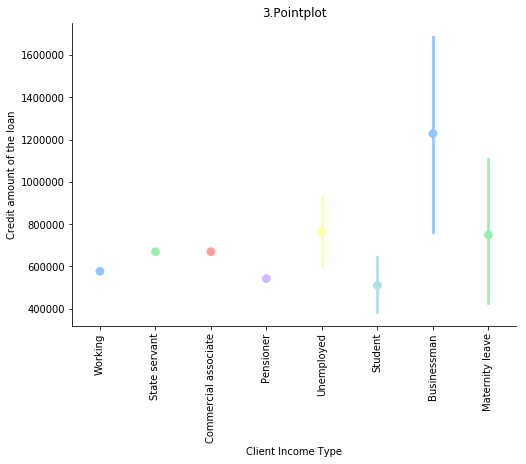

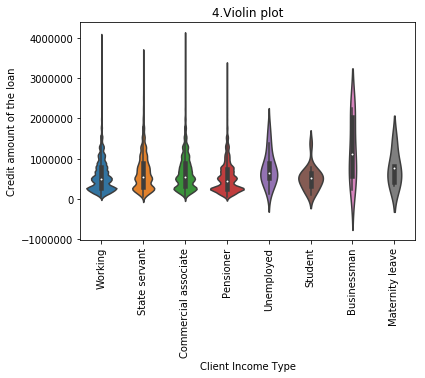

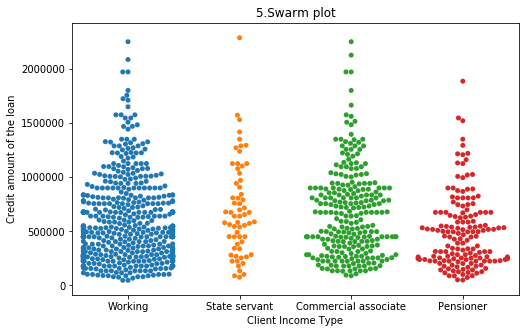

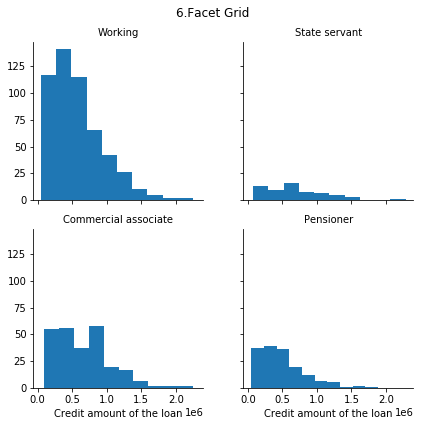

In [3]:
#DRILL Q3: Using credit amount of the loan and client income type for six types of plots
#Boxplot
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df)
plt.xticks(rotation=90)
plt.xlabel('Client Income Type')
plt.ylabel('Credit amount of the loan')
plt.title('1.Boxplot')
plt.show()

#Barplot
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df)
plt.xticks(rotation=90)
plt.xlabel('Client Income Type')
plt.ylabel('Credit amount of the loan')
plt.title('2.Barplot')
plt.show()

#Pointplot
sns.factorplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df, kind='point',ci=95,palette="pastel",
               size=5, aspect=1.5)
plt.xticks(rotation=90)
plt.xlabel('Client Income Type')
plt.ylabel('Credit amount of the loan')
plt.title('3.Pointplot')
plt.show()

#Violin plot
sns.violinplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df)
plt.xticks(rotation=90)
plt.xlabel('Client Income Type')
plt.ylabel('Credit amount of the loan')
plt.title('4.Violin plot')
plt.show()

#Swarm plot
dataq3 = df.iloc[0:1000]
plt.figure(figsize=(8, 5))
sns.swarmplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=dataq3)
plt.xlabel('Client Income Type')
plt.ylabel('Credit amount of the loan')
plt.title('5.Swarm plot')
plt.show()

#Facet Grid
g = sns.FacetGrid(dataq3, col="NAME_INCOME_TYPE", col_wrap=2)
g.map(plt.hist, "AMT_CREDIT")
g.set_titles("{col_name}")
g.set_axis_labels(x_var='Credit amount of the loan')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('6.Facet Grid')
plt.show()